# Gradients

**TODO:** 
1. Fix mini-batch to work with simulated data by me and not using scikit-learn. (Where is the problem?)
1. Add discussion about learning rate and batch size
    * https://miguel-data-sc.github.io/2017-11-05-first/

refs: 
* Book: Elements of Statistical Learning
* https://www.deeplearningbook.org/  <== This is a goodreference for Deep Learning
* https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing
* https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/
* https://www.youtube.com/watch?reload=9&v=Ne3hjpP7KSI
* https://github.com/bhattbhavesh91/gradient-descent-variants/blob/master/gradient-descent-variants-notebook.ipynb
* https://github.com/bhattbhavesh91/gradient-descent-variants
* https://intellipaat.com/community/41845/what-is-the-difference-between-a-cost-function-and-a-loss-function-in-machine-learning
* math demonstrations:
    * https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated/278812 
    * https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d
    * https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
* Explanations and equeations about momentum and others optmizers:
    * https://vzahorui.net/optimization/gradient-descent/
    
* Vidsual animations: https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c

In this notebook, we review some main concepts in deep learning and implement the 3 main gradient descent algorithms using the NumPy library for linear regression and logistic regression.

--------
Terms used in deep learning:

* epoch: one pass over the entire data
* 1 step: update the parameters
* B: mini-batch size

ref: https://towardsdatascience.com/learning-parameters-part-3-ee8558f65dd7

| Gradient Algo                     | #steps in epoch |
|-----------------------------------|-----------------|
| Vanilla or Batch Gradient Descent | 1               |
| Stochastic Gradient Descent       | N               |
| Mini Batch Gradient Descent       | N/B             |



Analogy with Gravity (My background is in Physics)

* Potential Energy => Loss Function
* Goal Minimize Potential Energy => Minimize Loss Function 
* Mountain (x,y,z) => Regression Coefficient ($\theta$)
* modify (x,y) to archive the goal => modify $\theta$ to achive the goal
* Bottom of the Bowl or mountain => Minimum Value of Loss (Error)


In [1]:
import numpy as np
import random as rand

import matplotlib
import matplotlib.pyplot as plt
# required for iteractive plot
%matplotlib notebook  

import seaborn as sns
from scipy import stats 

from sklearn.datasets import make_classification, make_blobs, make_regression

from typing import List, Set, Dict, Tuple, Optional, Union

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Cost, Loss and hypothesis function


* Hypothesis function $h_{\theta}(x, y)$
    1. It is the fucntional responsiple to do the mapping: (x -> y). It is the model you pick that you believe is the best to solve the task. 
    1. Ex in the context of Machine learning: linear regression, logistic regression and support vector machine all they have different $h_{\theta}(x, y)$. You neeed to determine the best by try and fail
    1. Ex context of deep learning: It is the different architecture you are tryng


The terms **Loss** and **Cost** functions are frequent used by meaning the same things, but there are differences.

* Loss function $\mathcal{L}(h_{\theta}(x^{(i)}), y_i)$
    1. It is the penality the algorithms pays by predicting $\hat{y}_i = h_{\theta}(x^{(i)}, y_i)$
        * if the estimation (prediction) is right $\hat{y}_i$, the penality should be zero
        * if the estimation (prediction) is wrong, the penality should increase with the difference between $\hat{y}_i$ and $y_i$
     1. It is a fucntion of data and not parameters. The parameters are assumed given and constant
     1. Examples of loss functions: Linear regression
     
$$
\mathcal{L}(x,y) =  \frac{1}{2} \left ( x \theta_1 + \theta_0 - y \right )^2 \\
h_{\theta_0,\theta_1}(x, y) = \left ( x \theta_1 + \theta_0 - y \right )^2
$$
     

* Cost function $J(\theta)$ 
    1. It is a function only of parameters. Data $x^{(i)},y_i$ are assumed as given and constant
    1. It is the average of the loss function over the dataset
    1. It means the average cost (penality) the algo paid for there mistakes over data sets or the complete batch
    
$$
J(\theta) = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(h_{\theta}(x^{(i)}), y_i)
$$

## Gradient descent


In machine learning we define the loss fucntion $L = L(y, h_{\theta}(X))$. This function is reponsible to penalize mistakes. The machine learning algorithm learns by minimizing this function. $\theta$ are the paremeters of the models, $X$ is the trainning data and $y$ are the labels. The term $h_{\theta}(X)$ is the hypothesis.  We define the cost function $J(\theta) = \frac{1}{n} \sum_{i=1}^n \mathcal{L}(h_{\theta}(x^{(i)}), y_i)$. Notices that the cost function $J(\theta)$ depends of the trainning data $X$, $y$ as well, but is considered only a function of the parameters $\theta$. Bellow is the cost function for Multiple Linear Regression:

$
J(\theta) =  \frac{1}{2n} \left ( X \theta - y \right )^t\left ( X \theta - y \right )
$

where $h_{\theta}(X) = X \theta$.

From calculus, 

$
d J(\theta) = \nabla_{\theta} J(\theta) * d\theta
$

where $*$ is the scalar product or inner product. Because the $cos(a)$ function is maximun when $a=0$ ($d\theta$ and $\nabla_{\theta}$ are aligned in this situation), we know that the opposite direction of the gradient point to the direction that minimizes the cost function $J(\theta)$.

> PS: The opposite direction $\nabla_{\theta}J(\theta)$ minimizes the cost function. The gradient is a compass that instead of point North, it is always point downhill.


The algorithm is summarized as follow:
    
1. Start from a random point $\theta = \theta_0$

1. Repeat the steps

    1. update direction (find the direction to minimize $J(\theta)$): $\Delta \theta = -\eta \nabla_{\theta}J(\theta)$
    
    1. update the position (keep changing the parameters to minimize $J(\theta)$): $\theta = \theta + \Delta \theta$
    
where $\eta$ is the **learning rate**. 


## Notes about Gradients

**TODO:** Consider add this to another notebook

* Gradient Descent with momentum

    * The problem mmentum address is to speedup the steps in the regions where gradients is too small (Vanish). It helps the gradient:
        * escape from local small valleys 
        * speedup in plateuas and
        * also avoid stopping in saddle points
    * Intuition: adds term that can be understood as innertial term in the update 
    * Gradients tends to jiggle more when it is closed to minimum because the gradients are change directions. Othe siolutions try to address this peoblems: **AdaGrad**, **RMSProp** and **Adam (momentum+ RMSProp) (This is the best available right now)**
    
    
$
d\theta = \beta d\theta + \eta (1 - \beta)  \nabla_{\theta} J(\theta) 
$
    
Default value $\beta = 0.9$ works well in many situations
* $\beta = 0$: we have normall gardeints (no momentum)
* $\beta = 1$: oure momentum and the slopes (gradients) are ignored in the update




## Examples of cost functions and their gradients

### Linear Rgression

$
J(\theta) = \frac{1}{2n} \sum_i^n \left ( h_{\theta}(x_i) - y_i \right )^2
$

$
J(\theta) = \frac{1}{2n} \left ( X \theta - y \right )^t\left ( X \theta - y \right )
$


$
\nabla_{\theta}J(\theta) = \frac{1}{n} X^t \left ( X\theta - y \right )
$

In [2]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_linear_regression(theta, X, y):
    
    #import pdb; pdb.set_trace()
    n = X.shape[0]
    
    # error: pred - y
    z = np.matmul(X,theta) - y

    return np.matmul(z.T,z)/2.0/n  # <== average of all loss MSE

def gradient_linear_regression(theta,X,y):
    
    n = X.shape[0]
    
    # error: pred - y
    z = np.matmul(X,theta) - y    
    grad = np.matmul(X.T,z)
    
    #print(f"theta.shape: {theta.shape}; X.shape: {X.shape}; z.shape: {z.shape}; grad.shape: {grad.shape}")
    
    return grad/n

### Logistic Regression Sigmoid activation

* vectorized formula of the cost function: https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

* Cost function is also calles **Cross-entropy** or **log loss**

**TODO:** Try to find a demonstartion of the vectorial version of the gradient using matrix derivative

$
J(\theta) = \frac{1}{n} \sum_i^n \left ( y^i log(h_{\theta}(x_i)) - (1 - y_i) log(1 - h_{\theta}(x_i)) \right ) \\
J(\theta) = - \frac{1}{n} \left ( y^t log(h(X\theta)) + (1 - y)^t log(1 - h(X\theta))  \right )
$

$
\nabla_{\theta}J(\theta) = X^t \left ( \sigma(X\theta) - y) \right )
$

where:

$
h(X\theta) = h(z) = \sigma(z) \equiv \frac{1}{1 + e^{-z}} \\
\frac{\partial}{\partial z} \sigma(z) = \sigma(z) (1 - \sigma(z))  \\
z = X\theta
$


In [3]:
# X: matrix nxd
# y: column vector nx1
# theta: column vector dx1

def cost_func_logistic_regression(theta, X, y):
    
    n = X.shape[0]
    z = np.matmul(X,theta)  # nx1
    h = 1.0/(1.0 + np.exp(-z))  # activation: nx1
    
    cost = (-1.0/n)*(y^t*np.log(h) + (1-y)^t*(np.log(1-h))) # scalar
    
    return cost

def gradient_logistic_regression(theta,X,y):
    
    z = np.matmul(X,theta)
    
    # pred
    h = 1.0/(1.0 + np.exp(-z))  # activation
    
    return np.matmul(X.T,h - y)

## Simulated Data

(50, 2)

(50,)

array([[ 1.        , -1.        ],
       [ 1.        , -0.95918367],
       [ 1.        , -0.91836735]])

True parameters: [4. 5.]
bayes error: 0.01


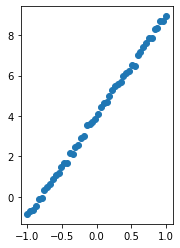

In [8]:
def make_2d_linear_data(slope: float, intercept: float, noise: float, n_sanples: int, random: int = 2021):
    
    x = np.linspace(-1.0, 1.0, n).reshape(n,1)
    
    np.random.seed(random)
    e = np.random.normal(0.0,noise,n).reshape(n,1)
    
    y = slope*x + intercept + e
    y = y.reshape(n,)

    _ones = np.ones((n,1))

    x.shape

    _ones.shape

    X = np.hstack((_ones, x))
    
    return X,y, e

slope = 5.0 
intercept = 4.0
noise = 0.1
n = 50

X,y, e = make_2d_linear_data(slope,intercept, noise, n)
theta_true = np.array([intercept,slope])

X.shape
y.shape

X[0:3]

print(f"True parameters: {theta_true}")
bayes_error = np.sum(np.matmul(e.T,e))/n  # <== mse
print(f"bayes error: {bayes_error:.2f}")

_ = plt.subplot(121);
_ = plt.scatter(X[:,1],y);

plt.show()

## Batch Gradient descent



Batch gradient descent computes the gradient using the whole dataset. 

In [12]:
def gradient_descent(X,y, cost_func, gradient_func, learning_rate = 0.01, 
                     n_iterations = 100, init_guess=None):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    theta_history = np.zeros((n_iterations,d))
    grad_history = np.zeros((n_iterations,d))
    cost_history = np.zeros(n_iterations)
    
    # init guess
    if init_guess is None:
        theta = np.random.randn(d)
        
    else:
        theta = init_guess

    #print(f"theta0: {theta}")
    for it in range(0,n_iterations):

        # compute gradients and cost function
        cost_at_theta = cost_func(theta,X,y)
        gradient_at_theta = gradient_func(theta,X,y)

        # log history for ploting
        theta_history[it, :] = theta.T
        grad_history[it,:] = gradient_at_theta.T
        cost_history[it] = cost_at_theta
        
        # update parameters
        dtheta = -learning_rate* gradient_at_theta
        theta = theta + dtheta

    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

### Training 

True parameters: 32.69


(300, 1)

(300,)

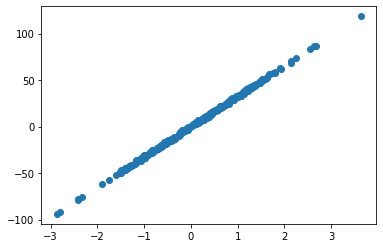

In [20]:
X, y, theta_true = make_regression(n_samples = 300, 
                       n_features=1, 
                       n_informative=1, 
                       noise=1,  # <== This is related with the bayes error. The minimum the cost function can converted
                        coef=True,
                       random_state=2021)

print(f"True parameters: {theta_true:.2f}")

X.shape
y.shape
plt.scatter(X,y)

In [21]:
%%time
lr = 0.05
n_iter = 100

init_guess = np.array([50.0])

theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                  lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true:.2f}")


Initial Guess it: 0 => theta: [50.]; grad: [17.66328858]; cost: 153.96
it: 99 => theta: [32.7167683]; grad: [0.10120038]; cost: 0.45
Expected theta:32.69
CPU times: user 4.68 ms, sys: 2.95 ms, total: 7.63 ms
Wall time: 5.52 ms


### Checking the fit

We can inspect our solution by ploting the prediction against the data.

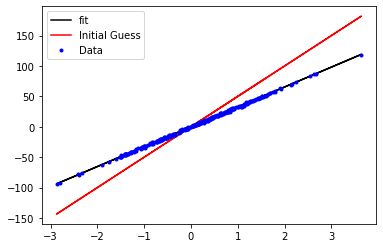

In [22]:
y_pred0 = np.matmul(X,theta0)
y_pred = np.matmul(X,theta)

plt.plot(X,y_pred,c='black', label='fit');
plt.plot(X,y_pred0,'r', label='Initial Guess');
plt.plot(X,y,'b.', label='Data');
plt.legend();

### Cost Function and  learning rate 

1. large: loss will explode
1. small: takes longer to learn
1. need to find the optmum learning rate

In [23]:
%%time
lr = 2.0
n_iter = 100

theta_big, history_big = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                          lr, n_iter, init_guess)

lr = 5e-3
n_iter = 100

theta, history_small = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                        lr, n_iter, init_guess)

CPU times: user 5.49 ms, sys: 60 µs, total: 5.55 ms
Wall time: 5.58 ms


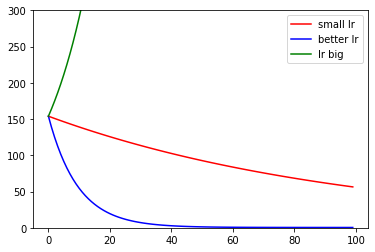

In [28]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history_small['cost'],'r',label='small lr');
_ = ax.plot(range(n_iter),history['cost'],'b',label='better lr');
_ = ax.plot(range(n_iter), history_big['cost'], 'g', label="lr big");
_ = ax.set_ylim([0, 300.0])
ax.legend();

### Changing bayes error

True parameters: 32.69


(300, 1)

(300,)

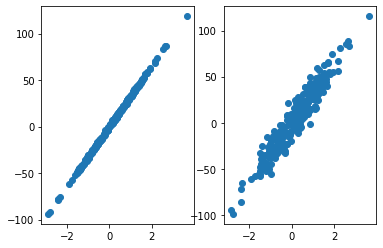

In [29]:
n_sample = 300
std_low_bayes_error = 1

X_low_bayes_error, y_low_bayes_error, theta_true = make_regression(n_samples = n_sample, 
                       n_features=1, 
                       n_informative=1, 
                       noise=std_low_bayes_error,  # <== Low bayes error
                        coef=True,
                       random_state=2021)

print(f"True parameters: {theta_true:.2f}")


std_high_bayes_error = 10
X_high_bayes_error, y_high_bayes_error, theta_true = make_regression(n_samples = n_sample, 
                       n_features=1, 
                       n_informative=1, 
                       noise=std_high_bayes_error,  # <== High bayes error
                        coef=True,
                       random_state=2021)

X_low_bayes_error.shape
y_low_bayes_error.shape

_ = plt.subplot(121);
_ = plt.scatter(X_low_bayes_error,y_low_bayes_error);
_ = plt.subplot(122);
_ = plt.scatter(X_high_bayes_error,y_high_bayes_error);

plt.show()

In [30]:
%%time
lr = 0.05
n_iter = 100

init_guess = np.array([50.0])

theta, history_low_bayes_error = gradient_descent(X_low_bayes_error, y_low_bayes_error, cost_func_linear_regression, gradient_linear_regression, 
                                  lr, n_iter, init_guess)


theta, history_high_bayes_error = gradient_descent(X_high_bayes_error, y_high_bayes_error, cost_func_linear_regression, gradient_linear_regression, 
                                  lr, n_iter, init_guess)


CPU times: user 7.77 ms, sys: 2.2 ms, total: 9.97 ms
Wall time: 8.11 ms


**TODO:** Review this later

Remember for simple a linear regression:

$y = \hat{y} + \epsilon$

* $\epsilon$ is the bayes error 
* $\epsilon \sim N(h_{\theta}(x),\sigma^2)$

In [31]:
J_low_bayes_error = 1.0/2.0*pow(std_low_bayes_error,2)
std_low_bayes_error
J_low_bayes_error  # <= half of std^2

history_low_bayes_error['cost'][-1]

print()
J_high_bayes_error = 1.0/2.0*pow(std_high_bayes_error,2)
std_high_bayes_error
J_high_bayes_error # <= half of std^2

history_high_bayes_error['cost'][-1]

1

0.5

0.4498957115700963

10

50.0

44.491052934509085

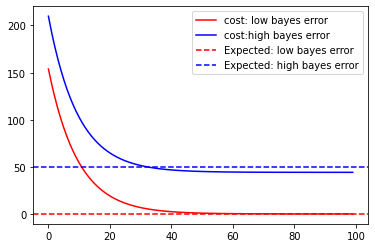

In [32]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history_low_bayes_error['cost'],'r',label='cost: low bayes error');
_ = ax.plot(range(n_iter),history_high_bayes_error['cost'],'b',label='cost:high bayes error');
_ = ax.axhline(y=J_low_bayes_error, color='r', linestyle='--',label='Expected: low bayes error');
_ = ax.axhline(y=J_high_bayes_error, color='b', linestyle='--',label='Expected: high bayes error');
ax.legend();

### Case: 2D feature space compare all approaches (Linear Regression)

In [81]:
slope = 5.0 
intercept = 4.0
noise = 0.1
n = 50

X,y,_ = make_2d_linear_data(slope,intercept, noise, n)
theta_true = np.array([intercept,slope])

In [103]:
%%time
lr =0.1
n_iter = 200

init_guess = np.array([-10.0, -10.0])

theta, history = gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][it]
grad =  history['grad'][it]
cost = history['cost'][it]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true}")


Initial Guess it: 0 => theta: [-10. -10.]; grad: [-14.01099638  -5.19944385]; cost: 137.12
it: 199 => theta: [4.01099637 4.97332617]; grad: [-1.09831868e-08 -4.61640576e-03]; cost: 0.00
Expected theta:[4. 5.]
CPU times: user 5.92 ms, sys: 2.26 ms, total: 8.18 ms
Wall time: 6.21 ms


In [104]:
history['cost'][0:11]

array([137.11996752, 115.81418011,  98.23288523,  83.69049415,
        71.63017554,  61.59949411,  53.23067099,  46.22458805,
        40.33782537,  35.37215592,  31.16603094])

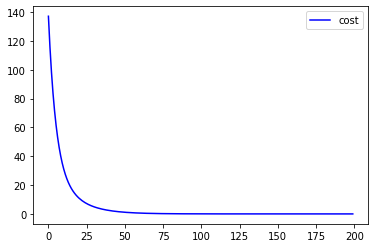

In [105]:
fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),history['cost'],'b',label='cost');
#_ = ax.set_ylim([0, 1])
ax.legend();

Generating parameters space

In [106]:
grid_size = 300
theta1 = np.linspace(-10, 10, grid_size)
theta2 = np.linspace(-10, 10, grid_size)

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

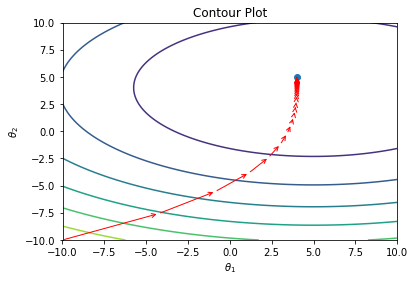

In [109]:
cp = plt.contour(Theta1, Theta2, J_grid)
#plt.colorbar(cp)

thetas = [ history['theta'][k] for k in range(0, len(history['cost']),5) ] 
for j in range(1,len(thetas)):
    _ = plt.annotate('', xy=thetas[j], xytext=thetas[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center');

plt.title('Contour Plot')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.scatter(theta_true[0],theta_true[1])  # <= Expected true value
# ax.set_ylim([205,215])
# ax.set_xlim([-15,0])
plt.show();

## Stochastic Gradient Descent

refs: 
* https://en.wikipedia.org/wiki/Stochastic_gradient_descent
* https://towardsdatascience.com/learning-parameters-part-3-ee8558f65dd7

In stochastic Gradient descent, instead of use the entire data $X$ to compute the gradients, we randonly peak one sample and use it to have an estimation of the gradients at that point. The estimation will not be accurate, but in average the algorithm will converge to an optimal solution. The lagorithm is ilustrade bellow:

The update formula is given by:


$
\theta = \theta - \eta \nabla_{\theta}J(X_i)
$


* Start with initi guess: $\theta$

* for each iteration

    1. random shuffle $X$
    1. for i=0,1,..., n-1
        1. Compute  $\nabla_{\theta}J(X_i)$
        1. update the parameters $\theta = \theta - \eta \nabla_{\theta}J(X_i)$


In [217]:
def stochastic_gradient_descent(X,y, cost_func, gradient_func, 
                                learning_rate = 0.01, n_iterations = 100, 
                                init_guess=None):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    # init guess
    if init_guess is None:
        theta = np.random.randn(d)
        
    else:
        theta = init_guess

    Xy = np.hstack((X,y.reshape((n,1))))
    
    theta_history = []
    grad_history = []
    cost_history = []
 
    #print(f"theta0: {theta}")
    for it in range(1,n_iterations):

        cost = 0.0
        
        # shuffle data
        rand_idx = np.random.randint(0, n, n )
        data_shuffle = Xy[rand_idx,:]
        
        # take n random samples of size 1 of the data 
        for i in range(n):

            X_i = data_shuffle[i,:-1].reshape(1, d)
            y_i = data_shuffle[i,-1]
            
            cost += cost_func(theta,X_i,y_i)
            #cost_at_theta = cost_func(theta,X,y)
            gradient_at_theta = gradient_func(theta,X_i,y_i)  # gradient approximation using 1 data point
            
            # log history for oploting
            theta_history.append(theta.T)
            grad_history.append(gradient_at_theta)
            
           # update parameters
            dtheta = -learning_rate* gradient_at_theta

            theta = theta + dtheta
                
        cost_history.append(cost/n)   # <= average loss in the epoch 
        
    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

#### Case: 1D parameter sapce

True parameters: 26.52


(50, 1)

(50,)

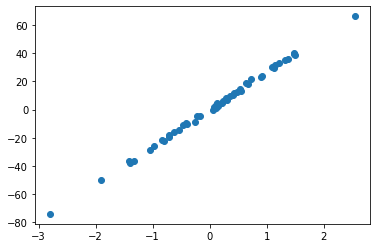

In [251]:
# Simulating data
X, y, theta_true = make_regression(n_samples = 50, 
                       n_features=1, 
                       n_informative=1, 
                       noise=1.0,
                       coef=True,
                       random_state=2021)

print(f"True parameters: {theta_true:.2f}")

X.shape
y.shape
plt.scatter(X,y)

In [252]:
%%time
lr =0.001
n_iter = 120

init_guess = np.array([20])

theta, history = stochastic_gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][-1]
grad =  history['grad'][-1]
cost = history['cost'][-1]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true:.2f}")


Initial Guess it: 0 => theta: [20]; grad: [-2.71086639]; cost: 21.07
it: 119 => theta: [26.49532125]; grad: [-0.1387342]; cost: 0.55
Expected theta:26.52
CPU times: user 179 ms, sys: 4.39 ms, total: 184 ms
Wall time: 224 ms


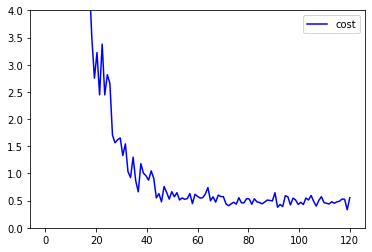

In [253]:
fig,ax = plt.subplots()

cost = history['cost']
    
m = len(cost)
x = np.linspace(0,n_iter,m)
    
_ = ax.plot(x,cost,'b',label='cost');

#_ = ax.plot(range(len(history['cost'])),history['cost'],'b',label='cost');
_ = ax.set_ylim([0, 4.0])
ax.legend();

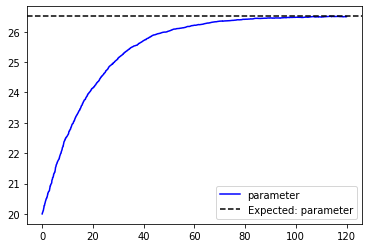

In [254]:
fig,ax = plt.subplots()

parameters = history['theta']
    
m = len(parameters)
x = np.linspace(0,n_iter,m)
    
_ = ax.plot(x,parameters,'b',label='parameter');

#_ = ax.plot(range(len(history['theta'])),history['theta'],'b',label='parameter');
_ = ax.axhline(y=theta_true, color='k', linestyle='--',label='Expected: parameter');
#_ = ax.set_ylim([, 25])
ax.legend();

#### Case: 2D parameters space

In [256]:
slope = 5.0 
intercept = 4.0
noise = 0.5
n = 50

X,y,_ = make_2d_linear_data(slope,intercept, noise, n)
theta_true = np.array([intercept,slope])

In [271]:
%%time
lr = 0.01
n_iter = 30

init_guess = np.array([-10.0, -10.0])

theta, history = stochastic_gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter, init_guess)

print()
theta0 = history['theta'][0]
grad0 =  history['grad'][0]
cost0 = history['cost'][0]

print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

it = n_iter -1
theta = history['theta'][-1]
grad =  history['grad'][-1]
cost = history['cost'][-1]

print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
print(f"Expected theta:{theta_true}")


Initial Guess it: 0 => theta: [-10. -10.]; grad: [-6.55144663  3.34257481]; cost: 89.10
it: 29 => theta: [4.03273007 4.76605622]; grad: [-0.04104949 -0.00083774]; cost: 0.12
Expected theta:[4. 5.]
CPU times: user 37.7 ms, sys: 2.41 ms, total: 40.1 ms
Wall time: 43 ms


In [272]:
history['cost'][0:11]

[89.09656691293567,
 49.8037387048641,
 25.662817767901842,
 13.932629734990185,
 10.804361934274391,
 7.443543454173848,
 4.724653330892314,
 3.0559308007613906,
 2.7782744927593397,
 1.3544410571997756,
 1.1132214626272272]

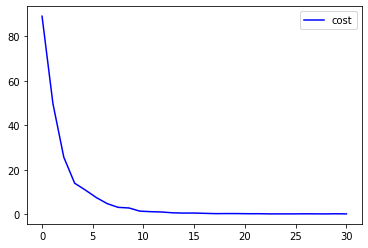

In [273]:
fig,ax = plt.subplots()

cost = history['cost']
    
m = len(cost)
x = np.linspace(0,n_iter,m)
    
_ = ax.plot(x,cost,'b',label='cost');

#_ = ax.plot(range(len(history['cost'])),history['cost'],'b',label='cost');
#_ = ax.set_ylim([0, 2])
ax.legend();

Generating parameters space

In [274]:
grid_size = n_iter
theta1 = np.linspace(-10, 10, grid_size)
theta2 = np.linspace(-10, 10, grid_size)

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

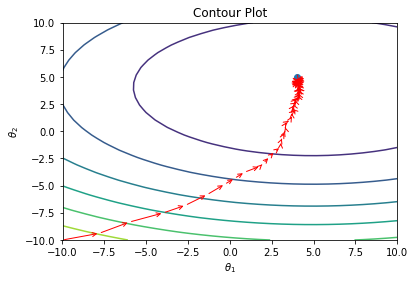

In [276]:
cp = plt.contour(Theta1, Theta2, J_grid)
#plt.colorbar(cp)

thetas = [ history['theta'][k] for k in range(0, len(history['theta']),20) ] 
for j in range(1,len(thetas)):
    _ = plt.annotate('', xy=thetas[j], xytext=thetas[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center');

plt.title('Contour Plot')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.scatter(theta_true[0],theta_true[1])  # <= Expected true value
# ax.set_ylim([205,215])
# ax.set_xlim([-15,0])
plt.show();

## Mini Batch Gradient Descent


res:
* mini batch update formula: https://stats.stackexchange.com/questions/140811/how-large-should-the-batch-size-be-for-stochastic-gradient-descent

* desambiguation: https://stats.stackexchange.com/questions/167088/stochastic-gradient-descent-vs-online-gradient-descent

In the case of mini-batch, instead of making an update with gradients of one data point at a time, we calculate gradients of a batch of data points of size B. 


$
\theta = \theta - \eta(t) \frac{1}{B} \sum_{b=0}^{B - 1}  \nabla J_{\theta}(\theta, m_b)
$

where $B$ is the cardinality of $m_b$ (the size of the batch).

1. Batch gradient descent, $𝐵=|X|$
1. Online stochastic gradient descent: $𝐵=1$
1. Mini-batch stochastic gradient descent: $𝐵>1$ but $𝐵<|𝑥|$.

> Note: in real life we're reading these training example data from memory and, due to cache pre-fetching and other memory tricks done by your computer, your algorithm will run faster if the memory accesses are coalesced, i.e. when you read the memory in order and don't jump around randomly. So, most SGD implementations shuffle the dataset and then load the examples into memory in the order that they'll be read.

> NOte: Online stochastic gradient descent is not the same as Sthocastibc gradient descent. The forst use the most recently gradients to update the parameters while the latter usepic up a random point. 

The function $\eta(t)$ is called learning rate schedule and it is constant in this notebook. 


> NOte: proper weight should be assigned to each mini-batch as a function of its size, when there are mini-batches with different size because number of training examples are not exatly divide by batch size.

In [ ]:
X = np.array([[1,2],[-2,-2],[3,3], [4,4]])
X

y = np.array([1,2,3,4]).reshape((4,1))
y.shape
y

data_shuffle = np.hstack((X,y))
data_shuffle

print("shuffle")
# in-place shuffle
np.random.shuffle(data_shuffle)
data_shuffle


print("shuffle again")
# in-place shuffle
np.random.shuffle(data_shuffle)
data_shuffle

X_shuffle = data_shuffle[:, :-1]
y_shuffle = data_shuffle[:, -1]

X_shuffle
y_shuffle

In [ ]:
n = 10
data = np.array([1,2,3,4,5,6,7,8,9,10])
batch_size = 3

data[9:12]  # numpy array take care of index, no segmentatio fault


In [ ]:
data = np.array([[1,2],[-2,-2],[3,3], [4,4]])
rand_idx = np.random.randint(0, 4,4)
    
rand_idx 
data[rand_idx,:]

In [ ]:
n, d = X.shape

theta = np.array([-10,-10])
grad = np.zeros(d) + 5



grad_at_theta = gradient_linear_regression(theta,X,y)

grad
grad_at_theta

grad += grad_at_theta
grad


In [287]:
# TODO: Change create_mini_batche to shuffle the shuffled data like in:
# https://ruder.io/optimizing-gradient-descent/
# https://realpython.com/gradient-descent-algorithm-python/
# https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/
# Test if I have the behavor I am expecting
# oscilation stochsstic > mini > vanila
# faster (needs less epoch): stochstic < mini < vanila
def create_mini_batches(data_shuffle, batch_size):
    
    n = data_shuffle.shape[0]
    mini_batches = []
    
    for k in np.arange(0, n, batch_size):
        
        X_mini = data_shuffle[k:k+batch_size,:-1]
        y_mini = data_shuffle[k:k+batch_size,-1]
        
        mini_batches.append((X_mini,y_mini))
    return mini_batches

def mini_batch_gradient_descent(X,y, cost_func, gradient_func, 
                                learning_rate = 0.01, n_iterations = 100,
                                batch_size = 8,
                                init_guess=None,seed=1):
    
    n = X.shape[0] # training size
    d = X.shape[1]  # number of dimensions or paramters
    
    # init guess
    if init_guess is None:
        theta = np.random.randn(d)
        
    else:
        theta = init_guess


    Xy = np.hstack((X,y.reshape((n,1))))
        
    theta_history = []
    grad_history = []
    cost_history = []
 
    #print(f"theta0: {theta}")
    for it in range(1,n_iterations):
        
        #rand_idx = np.random.randint(0, n, n )
        #data_shuffle = Xy[rand_idx,:]
        
        data_shuffle = Xy.copy()
        np.random.shuffle(data_shuffle)
        
        cost = 0.0
        mini_batches = create_mini_batches(data_shuffle,batch_size)
        
        for X_mini, y_mini in mini_batches:

            # compute the gradients and cost function
            
            #cost_at_theta = cost_func(theta,X_mini,y_mini)
            cost += cost_func(theta,X_mini,y_mini)
            gradient_at_theta = gradient_func(theta,X_mini,y_mini)  # gradient approximation using 1 data point
            

            # log history for oploting
            theta_history.append(theta.T)
            grad_history.append(gradient_at_theta)
            
           # update parameters
            dtheta = -learning_rate* gradient_at_theta

            theta = theta + dtheta
            
        cost_history.append(cost/len(mini_batches)) # << average loss in the epoch 

    history = {'theta': theta_history, "cost": cost_history, "grad": grad_history}

    return theta, history

In [288]:
# Verifying create_mini_batches function
X = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
X.shape
X

y = np.array([1,2,3,4,5]).T
y.shape
y

# for bs in [1,2,3,5]:
#     print(f"bs: {bs}")
#     create_mini_batches(X,y,bs)
    
    
# for bs in [1,2,3,5]:
#     print(f"bs: {bs}")
    
#     for (X_mini, y_mini) in next_batch(X, y,bs):
        
#         print(X_mini)
  
Xy  = np.hstack((X,y.reshape((5,1))))
for bs in [1,2,3,5]:
    print(f"bs: {bs}")
    create_mini_batches(Xy,bs)
        
# create_mini_batches(X,y,2)
# create_mini_batches(X,y,3)
# create_mini_batches(X,y,5)

(5, 2)

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

(5,)

array([1, 2, 3, 4, 5])

bs: 1


[(array([[1, 1]]), array([1])),
 (array([[2, 2]]), array([2])),
 (array([[3, 3]]), array([3])),
 (array([[4, 4]]), array([4])),
 (array([[5, 5]]), array([5]))]

bs: 2


[(array([[1, 1],
         [2, 2]]),
  array([1, 2])),
 (array([[3, 3],
         [4, 4]]),
  array([3, 4])),
 (array([[5, 5]]), array([5]))]

bs: 3


[(array([[1, 1],
         [2, 2],
         [3, 3]]),
  array([1, 2, 3])),
 (array([[4, 4],
         [5, 5]]),
  array([4, 5]))]

bs: 5


[(array([[1, 1],
         [2, 2],
         [3, 3],
         [4, 4],
         [5, 5]]),
  array([1, 2, 3, 4, 5]))]

In [289]:
X = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
X.shape
X

y = np.array([1,2,3,4,5]).T
y.shape
y

n_obs = 5
Xy = np.c_[X.reshape(n_obs, -1), y.reshape(n_obs, 1)]

Xy

(5, 2)

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

(5,)

array([1, 2, 3, 4, 5])

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4],
       [5, 5, 5]])

### Case: 2D feature space compare all approaches (Linear Regression)

In [290]:
slope = 5.0 
intercept = 4.0
noise = 0.1
n = 50

X,y,_ = make_2d_linear_data(slope,intercept, noise, n)
theta_true = np.array([intercept,slope])

In [305]:
%%time
n_iter = 150

print(f"#samples: {n}")

init_guess = np.array([-10.0, -10.0])
d1 = np.array

history = dict()

batch_sizes = [('sthocastic',1, 0.02,  np.array([-10.0, -10.0]) ),
               ('mini',12, 0.02,  np.array([-9.0, -10.0])), 
               ('vanila',n, 0.02, np.array([-10.0, -9.0]) )]

# batch_sizes = [ ('vanila',n, 0.01 )]

# batch_sizes = [ ('sthocastic',1, 0.1)]

for name, bs, lr, init_guess in batch_sizes:

    theta, history[name] = mini_batch_gradient_descent(X, y, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter,bs, init_guess)

    print(f"{name}, bs: {bs}")
    theta0 = history[name]['theta'][0]
    grad0 =  history[name]['grad'][0]
    cost0 = history[name]['cost'][0]

    print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

    it = n_iter -1
    theta = history[name]['theta'][-1]
    grad =  history[name]['grad'][-1]
    cost = history[name]['cost'][-1]

    print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
    print(f"Expected theta:{theta_true}")
    print()

#samples: 50
sthocastic, bs: 1
Initial Guess it: 0 => theta: [-10. -10.]; grad: [-18.66464979  -5.7136683 ]; cost: 72.16
it: 149 => theta: [4.01496506 4.98522519]; grad: [0.00344298 0.00147556]; cost: 0.00
Expected theta:[4. 5.]

mini, bs: 12
Initial Guess it: 0 => theta: [ -9. -10.]; grad: [-15.60258472  -7.65682122]; cost: 129.84
it: 149 => theta: [4.00547255 4.90783669]; grad: [-0.05999674 -0.01404376]; cost: 0.01
Expected theta:[4. 5.]

vanila, bs: 50
Initial Guess it: 0 => theta: [-10.  -9.]; grad: [-14.01099638  -4.85250508]; cost: 132.09
it: 149 => theta: [ 3.30641977 -0.00410597]; grad: [-0.70457661 -1.73148062]; cost: 4.57
Expected theta:[4. 5.]

CPU times: user 235 ms, sys: 22.9 ms, total: 257 ms
Wall time: 316 ms


In [307]:
k = 11
for idx, alg in enumerate(batch_sizes):
    
    name, bs, lr, _ = alg
    
    print(f"{idx}: {name} => bs:{bs}")
    history[name]['cost'][:k]

0: sthocastic => bs:1


[72.16123117608282,
 19.994072944385103,
 7.789481161003831,
 3.5613204213591287,
 1.701993945779357,
 0.8350827426692807,
 0.4143467488222746,
 0.20782037297408437,
 0.10510746429442999,
 0.054354079411306724,
 0.029428402620294548]

1: mini => bs:12


[129.84048270093345,
 114.49652961305992,
 84.66037652001283,
 64.02242784230535,
 76.73214523477036,
 44.55768835112683,
 43.55969411216496,
 38.155132991798936,
 30.96543314238942,
 27.566020879508994,
 35.22787703218769]

2: vanila => bs:50


[132.09399306126406,
 127.73779202173156,
 123.54200234486706,
 119.50043899627106,
 115.60715955586134,
 111.85645464233427,
 108.24283871637472,
 104.76104124762259,
 101.40599823099768,
 98.17284403855321,
 95.05690359357791]

In [308]:
cost = history['mini']['cost']
m = len(cost)
m 
x = np.linspace(0,n_iter,m)
len(x)

x[0], cost[0]
x[-1], cost[-1]

149

149

(0.0, 129.84048270093345)

(150.0, 0.0058692405248506685)

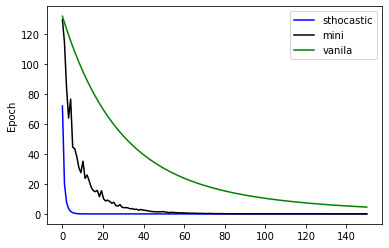

In [309]:
colors = ['b','k','g']

fig,ax = plt.subplots()
for idx, hyper_params in enumerate(batch_sizes):
    
    name, bs, lr,_ = hyper_params
    
    cost = history[name]['cost']
    
    m = len(cost)
    x = np.linspace(0,n_iter,m)
    
    _ = ax.plot(x,cost,colors[idx],label=name);
    
#_ = ax.set_ylim([6, 8])
_ = ax.set_ylabel("Cost")
_ = ax.set_ylabel("Epoch")
ax.legend();

* **Confirming fit**

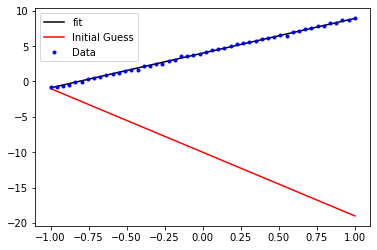

In [310]:
name = 'mini'

theta = history[name]['theta'][-1]
y_pred0 = np.matmul(X,init_guess)
y_pred = np.matmul(X,theta)

y_pred.shape

plt.plot(X[:,1],y_pred,c='black', label='fit');
plt.plot(X[:,1],y_pred0,'r', label='Initial Guess');
plt.plot(X[:,1],y,'b.', label='Data');
plt.legend();

In [311]:
# Initial Guess it: 0 => theta: [1. 5.]; grad: [-3.57033183 -2.24865653]; cost: 8.01
# it: 299 => theta: [3.4544965  7.59671996]; grad: [-2.07734288 -2.05987406]; cost: 0.80

print("Cost neighboor")
cost_func_linear_regression(np.array([intercept,slope])*0.90, X,y)
cost_func_linear_regression(np.array([intercept,slope]), X,y)
cost_func_linear_regression(np.array([intercept,slope])*1.10, X,y)

print("Grads")
gradient_linear_regression(np.array([intercept,slope]), X,y)

Cost neighboor


0.1304196405097919

0.004972630849485129

0.1262603150667294

Grads


array([-0.01099638,  0.00463778])

In [312]:
# Generatin 2d feature space
grid_size = 500

theta1 = np.linspace(-10.0, 10.0, grid_size)
theta2 = np.linspace(-10.0, 10.0, grid_size)

Theta1,Theta2 = np.meshgrid(theta1,theta2)

def parabola(theta):

    return pow(theta[0],2) + pow(theta[1],2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T

for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        #J_grid[r,c] = parabola(theta)
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

In [298]:
# debug
if len(theta1) < 7:
    theta1 
    Theta1
    
    theta2
    Theta2

    J_grid

In [328]:
name = 'mini'
history[name]['theta'][0:3]


theta_x = [ history[name]['theta'][k][0] for k in range(0, len(history[name]['theta']),1) ]
theta_y = [ history[name]['theta'][k][1] for k in range(0, len(history[name]['theta']),1) ]

len(theta_x)
len(theta_y)

theta_x[0:3]
theta_y[0:3]

[array([ -9., -10.]),
 array([-8.68794831, -9.84686358]),
 array([-8.42293226, -9.73714499])]

745

745

[-9.0, -8.687948305611306, -8.422932260630635]

[-10.0, -9.84686357562364, -9.737144992008957]

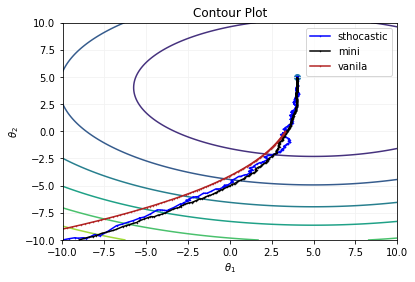

In [331]:
cp = plt.contour(Theta1, Theta2, J_grid)
#plt.colorbar(cp)
colors = ['b','k','firebrick']

for idx, hyper_params in enumerate(batch_sizes):
    name, bs, lr,init_guess = hyper_params
    
    theta_x = [ history[name]['theta'][k][0] for k in range(0, len(history[name]['theta']),1) ]
    theta_y = [ history[name]['theta'][k][1] for k in range(0, len(history[name]['theta']),1) ]
    
    plt.plot(theta_x, theta_y, color=colors[idx], marker='.', markersize=1, label=name)

plt.title('Contour Plot')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.scatter(intercept,slope)  # <= Expected true value
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')
plt.legend()
plt.show();

In [ ]:
?plt.contour

### Compare Tensorflow

In [ ]:
import tensorflow as tf

X.shape

# X  = [1, X]
X[0:3]

# remove first column
Xi =X[:,1].reshape(X.shape[0],1)
Xi.shape
Xi[0:3]

y.shape

init_guess

batch_sizes = [('sthocastic',1, 0.01),('mini',8, 0.01)]

W0 = tf.constant_initializer(init_guess[1])
b0 = tf.constant_initializer(init_guess[0])

models = {}
for name, bs, lr in batch_sizes:


    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
    models[name] = tf.keras.Sequential([
                tf.keras.layers.Dense(1, activation='linear',
                          kernel_initializer=W0,
                          bias_initializer=b0,
                          input_shape=(1,))
    ])


    sgd = tf.keras.optimizers.SGD(learning_rate=lr, 
                              momentum=0.0,
                              nesterov=False, name='SGD'
                             )

    models[name].compile(loss='mse', optimizer=sgd, metrics=['mse'])

    print('lr: {}'.format(models[name].optimizer.lr.numpy()))

    models[name].optimizer.get_config()
    
    _ = models[name].fit(Xi, y, epochs=n_iter, batch_size=bs, verbose=0, validation_split=0.0)

In [ ]:
Ws, bs = models['sthocastic'].get_weights()

theta = np.array([bs[0],Ws[0]])

theta

# theta = history[name]['theta'][-1]
y_pred0 = np.matmul(X,init_guess)
y_pred = np.matmul(X,theta)

y_pred.shape

plt.plot(Xi,y_pred,c='black', label='fit');
plt.plot(Xi,y_pred0,'r', label='Initial Guess');
plt.plot(Xi,y,'b.', label='Data');
plt.legend();

In [ ]:
colors = ['b','k','g']

fig,ax = plt.subplots()
for idx, hyper_params in enumerate(batch_sizes):
    
    name, bs, lr = hyper_params
    
    tf_cost = models[name].history.history['loss']
    
    m = len(tf_cost)
    x = np.linspace(0,n_iter,m)
    
    _ = ax.plot(x,tf_cost,colors[idx],label=name);
    
#_ = ax.set_ylim([6, 8])
_ = ax.set_ylabel("Cost")
_ = ax.set_ylabel("Epoch")
ax.legend();

In [ ]:
algo = 'mini'
tf_cost = model.history.history['loss']
cost = history[algo]['cost']

fig,ax = plt.subplots()
_ = ax.plot(range(n_iter),tf_cost,'b',label='tf_cost');
_ = ax.plot(range(n_iter),cost,'k',label=algo);
#_ = ax.set_ylim([0, 1])
ax.legend();

In [ ]:
??tf.keras.optimizers.SGD

In [ ]:
grid_size = n_iter
theta1 = np.linspace(-20, 20, grid_size)
theta2 = np.linspace(150, 300, grid_size)

Theta1,Theta2 = np.meshgrid(theta1,theta2)

J_grid = np.zeros((grid_size,grid_size))
theta = np.array([0.0,0.0]).T
for r in range(0,grid_size):
    
    for c in range(0,grid_size):
        
        theta[0] = theta1[r]
        theta[1] = theta2[c]
        
        J_grid[r,c] = cost_func_linear_regression(theta, X,y)

In [ ]:
cp = plt.contour(Theta1, Theta2, J_grid)
#plt.colorbar(cp)

thetas = [ history['theta'][k] for k in range(0, n_iter,3) ] 
for j in range(1,len(thetas)):
    _ = plt.annotate('', xy=thetas[j], xytext=thetas[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center');

plt.title('Contour Plot')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.scatter(theta_true[0],theta_true[1])  # <= Expected true value
# ax.set_ylim([205,215])
# ax.set_xlim([-15,0])
plt.show();

### TODO: Try to visualize vanish gradients and exploding gradients


with simulated data

## Gradient Exploding

(50, 2)

(51, 2)

(50,)

(51,)

True parameters: [4. 5.]


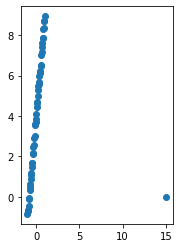

In [366]:
slope = 5.0 
intercept = 4.0
noise = 0.1
n = 50

X,y,_ = make_2d_linear_data(slope,intercept, noise, n)
theta_true = np.array([intercept,slope])

outlier_X = [1., 15]
outlier_y = 0.0

X1 = np.vstack((X,outlier_X))
y1 = np.hstack((y,outlier_y))

X.shape
X1.shape

y.shape
y1.shape

print(f"True parameters: {theta_true}")

_ = plt.subplot(121);
_ = plt.scatter(X1[:,1],y1);

plt.show()

In [394]:
lr = 0.01
n_iter = 30
bs = 51
init_guess = np.array([-10.0, -10.0])

sim = [('No outlier: sthochastic',1,(X,y)),
       ('Outlier: sthochastic',1, (X1,y1)),
       ('Outlier: mini',8, (X1,y1)),
       ('Outlier: vanila',51, (X1,y1))
      ]

history = {}
for name, bs, data in sim:
    
    X_sim,y_sim = data
    
    theta, history[name] = mini_batch_gradient_descent(X_sim, y_sim, cost_func_linear_regression, gradient_linear_regression, 
                                             lr, n_iter,bs, init_guess)
    print()
    theta0 = history[name]['theta'][0]
    grad0 =  history[name]['grad'][0]
    cost0 = history[name]['cost'][0]

    print(f"Initial Guess it: 0 => theta: {theta0}; grad: {grad0}; cost: {cost0:.2f}")

    it = n_iter -1
    theta = history[name]['theta'][-1]
    grad =  history[name]['grad'][-1]
    cost = history[name]['cost'][-1]

    print(f"it: {it} => theta: {theta}; grad: {grad}; cost: {cost:.2f}")
    print(f"Expected theta:{theta_true}")


Initial Guess it: 0 => theta: [-10. -10.]; grad: [-18.12783506  -4.80942563]; cost: 96.22
it: 29 => theta: [4.01165359 4.89200793]; grad: [ 0.04642672 -0.03884685]; cost: 0.01
Expected theta:[4. 5.]

Initial Guess it: 0 => theta: [-10. -10.]; grad: [-6.9694588   3.27137862]; cost: 291.52
it: 29 => theta: [ 5.04620618 66.06768267]; grad: [-24.93488558  10.68637953]; cost: 8912.81
Expected theta:[4. 5.]

Initial Guess it: 0 => theta: [-10. -10.]; grad: [-13.22867437  -2.02747195]; cost: 337.62
it: 29 => theta: [2.06999982 0.20316683]; grad: [ 0.76518357 -1.05427066]; cost: 5.81
Expected theta:[4. 5.]

Initial Guess it: 0 => theta: [-10. -10.]; grad: [-16.87352587 -52.1563175 ]; cost: 385.41
it: 29 => theta: [-6.22079677 -1.94176311]; grad: [-10.72425296 -12.75284511]; cost: 71.74
Expected theta:[4. 5.]


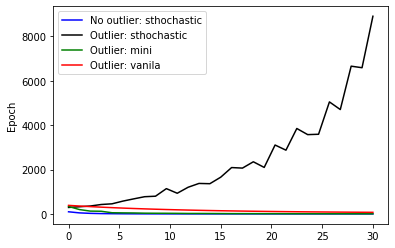

In [395]:
colors = ['b','k','g','r']

fig,ax = plt.subplots()
for idx, sim_param in enumerate(sim):
    
    name, bs, data = sim_param
    
    cost = history[name]['cost']
    
    m = len(cost)
    x = np.linspace(0,n_iter,m)
    
    _ = ax.plot(x,cost,colors[idx],label=name);

_ = ax.set_ylabel("Cost")
_ = ax.set_ylabel("Epoch")
ax.legend();


## Gradient vanish

1. bad initialzation (**logistic regression**)
1. deeper neural network (See intro_back_propagation) DO small discussion